In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset as data

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import env

# Using this lesson as a guide, perform clustering on the iris dataset.

In [7]:
url = env.get_connection('iris_db')

query = '''
            SELECT *
            FROM species
            JOIN measurements USING(species_id)
        '''

df = pd.read_sql(query,url)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   species_name    150 non-null    object 
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [10]:
def the_split(df):
    
    # train/validate/test split and is reproducible due to random_state = 123
    train_validate, test= train_test_split(df, test_size= .2, random_state= 123)
    train, val= train_test_split(train_validate, test_size= .3, random_state =123)
    
    
    print(f'Train shape:{train.shape}\n' )   
    print(f'Validate shape:{val.shape}\n' )    
    print(f'Test shape:{test.shape}\n' )
    print(f'Data Info:{train.info()}\n')
    return train, val, test   
train, val, test= the_split(df)

Train shape:(84, 7)

Validate shape:(36, 7)

Test shape:(30, 7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 56 to 113
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      84 non-null     int64  
 1   species_name    84 non-null     object 
 2   measurement_id  84 non-null     int64  
 3   sepal_length    84 non-null     float64
 4   sepal_width     84 non-null     float64
 5   petal_length    84 non-null     float64
 6   petal_width     84 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.2+ KB
Data Info:None



In [12]:
X= train[['petal_length', 'petal_width']]

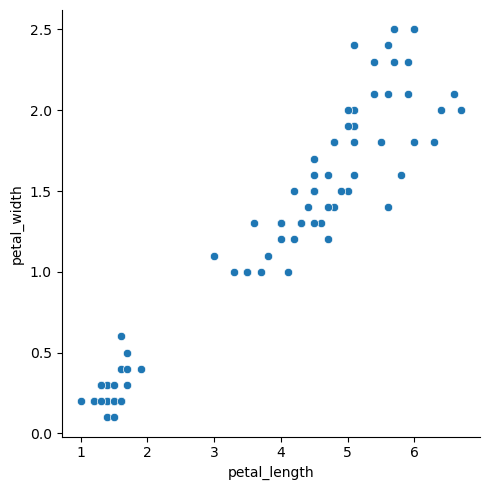

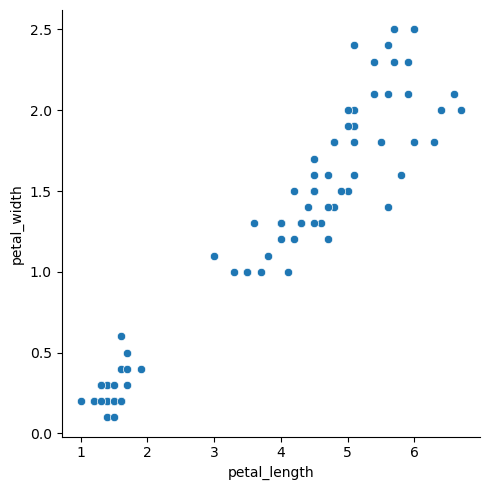

In [19]:
sns.relplot(data= X, x= 'petal_length', y= 'petal_width')
plt.show()

In [22]:
kmeans= KMeans(n_clusters= 3, random_state= 42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [23]:
X['unscaled_custers']=kmeans.predict(X)
X.head()

/var/folders/xf/3yzy_crd6fg3jwj3r580c2dm0000gn/T/ipykernel_12290/1095923196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['unscaled_custers']=kmeans.predict(X)


,petal_length,petal_width,unscaled_custers
56,4.7,1.6,2
40,1.3,0.3,1
70,4.8,1.8,2
23,1.7,0.5,1
139,5.4,2.1,0


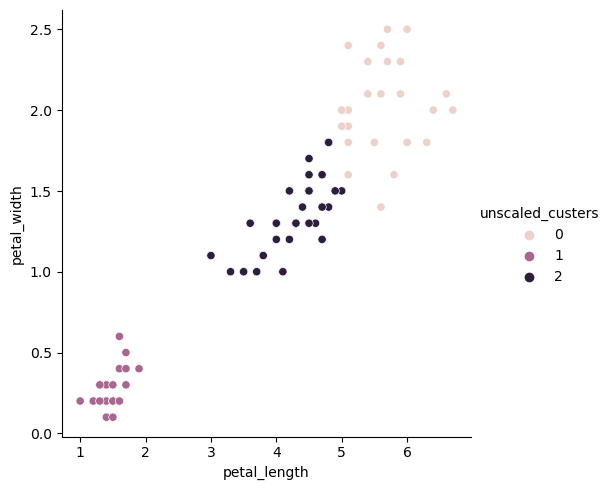

In [26]:
sns.relplot(data=X,x='petal_length',y='petal_width',hue='unscaled_custers')
plt.show()

In [27]:
mms= MinMaxScaler()
X[['petal_length', 'petal_width']]= mms.fit_transform(X[['petal_length', 'petal_width']])
X.head()

/var/folders/xf/3yzy_crd6fg3jwj3r580c2dm0000gn/T/ipykernel_12290/1401669397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['petal_length', 'petal_width']]= mms.fit_transform(X[['petal_length', 'petal_width']])


,petal_length,petal_width,unscaled_custers
56,0.649123,0.625000,2
40,0.052632,0.083333,1
70,0.666667,0.708333,2
23,0.122807,0.166667,1
139,0.771930,0.833333,0


In [28]:
kmeans_scaled = KMeans(n_clusters=3,random_state=42)

kmeans_scaled.fit(X[['petal_length','petal_width']])

KMeans(n_clusters=3, random_state=42)

In [30]:
X['scaled_clusters']=kmeans_scaled.predict(X[['petal_length','petal_width']])
X.head()

/var/folders/xf/3yzy_crd6fg3jwj3r580c2dm0000gn/T/ipykernel_12290/1901386480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['scaled_clusters']=kmeans_scaled.predict(X[['petal_length','petal_width']])


,petal_length,petal_width,unscaled_custers,scaled_clusters
56,0.649123,0.625000,2,2
40,0.052632,0.083333,1,0
70,0.666667,0.708333,2,1
23,0.122807,0.166667,1,0
139,0.771930,0.833333,0,1


# 1 Choose features other than the ones used in the lesson.

 A. Visualize the results of your clustering.
 

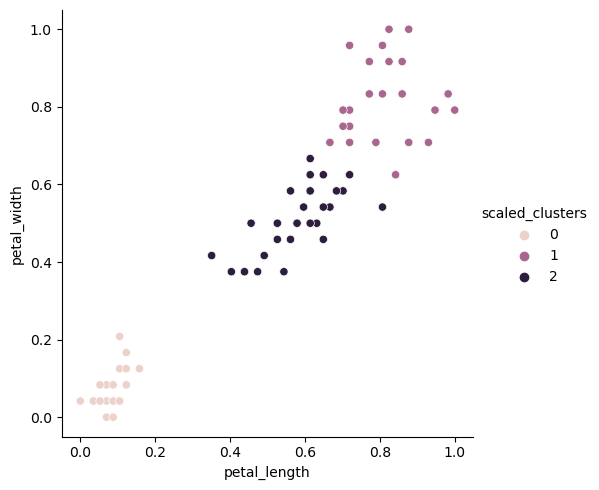

In [31]:
sns.relplot(data=X,x='petal_length',y='petal_width',hue='scaled_clusters')
plt.show()

 B. Use the elbow method to visually select a good value for k.

In [32]:
kmeans.inertia_

18.961559440559444

In [33]:
inertia= []
seed= 42

for n in range(1,11):
    kmeans= KMeans(n_clusters= n, random_state= 42)
    kmeans.fit(X[['petal_length', 'petal_width']])
    inertia.append(kmeans.inertia_)
inertia

[15.27745098308637,
 3.1133671103044964,
 1.0951329196862438,
 0.7383505357552376,
 0.5402043994423379,
 0.4121785047930592,
 0.3446850938872521,
 0.29465784191228556,
 0.24246603822110227,
 0.21689872385819703]

In [34]:
results_df= pd.DataFrame({'n_clusters': list(range(1, 11)),
                           'inertia': inertia})
results_df

,n_clusters,inertia
0,1,15.277451
1,2,3.113367
2,3,1.095133
3,4,0.738351
4,5,0.540204
5,6,0.412179
6,7,0.344685
7,8,0.294658
8,9,0.242466
9,10,0.216899


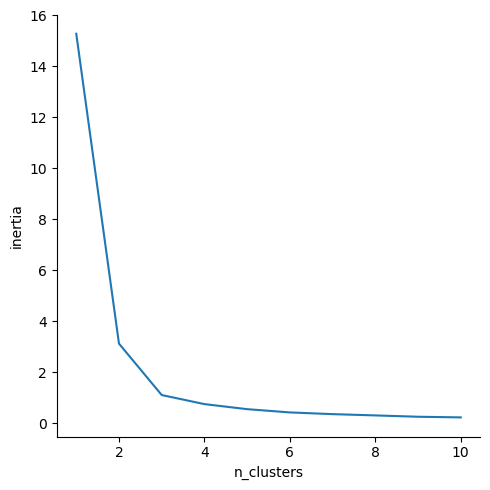

In [35]:
sns.relplot(data= results_df, x= 'n_clusters', y= 'inertia', kind= 'line')
plt.show()

C. Repeat the clustering, this time with 3 different features.

D. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

# 2 How does scaling impact the results of clustering?

# 3 Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.